In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Churn_Modelling.csv')

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data.drop('Surname',axis=1,inplace=True)

In [5]:
data.drop(columns='RowNumber',inplace=True)

In [6]:
data.drop('CustomerId',axis=1,inplace=True)

In [7]:
data.drop(columns='Geography',inplace=True)

In [8]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
data.shape

(10000, 10)

In [10]:
data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
data.dtypes

CreditScore          int64
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
data.duplicated().sum()

0

In [13]:
data.describe

<bound method NDFrame.describe of       CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619  Female   42       2       0.00              1          1   
1             608  Female   41       1   83807.86              1          0   
2             502  Female   42       8  159660.80              3          1   
3             699  Female   39       1       0.00              2          0   
4             850  Female   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771    Male   39       5       0.00              2          1   
9996          516    Male   35      10   57369.61              1          1   
9997          709  Female   36       7       0.00              1          0   
9998          772    Male   42       3   75075.31              2          1   
9999          792  Female   28       4  130142.79              1          1   

      IsActiveMem

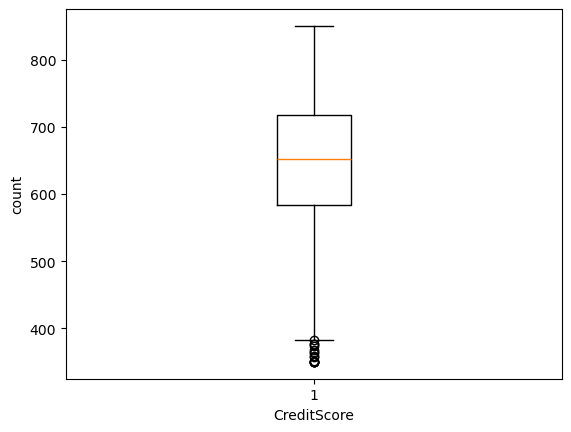

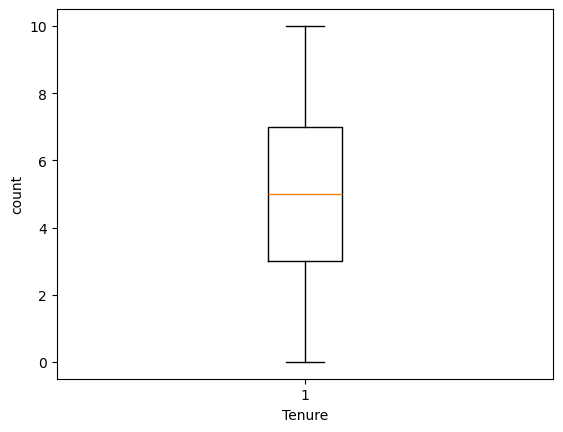

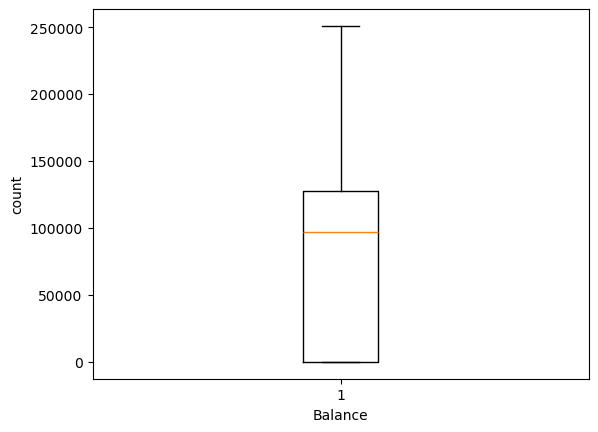

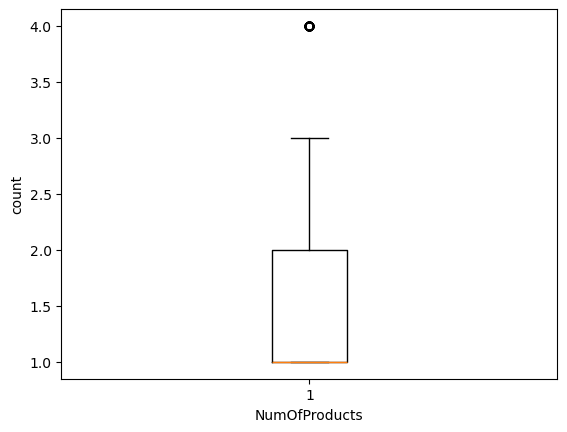

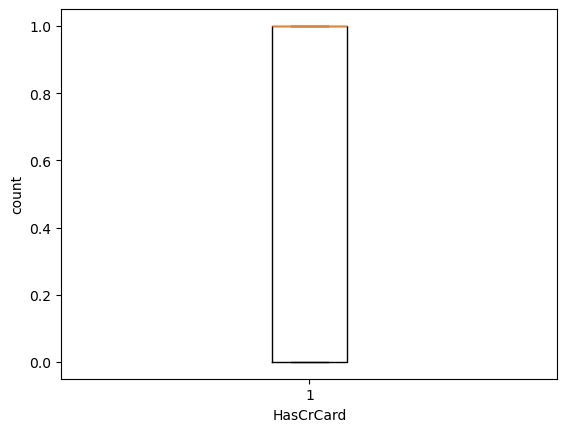

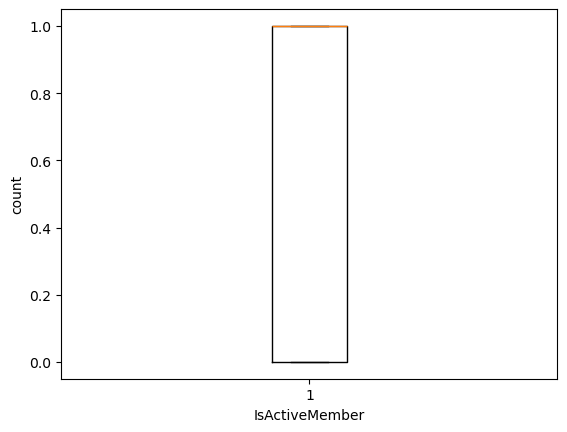

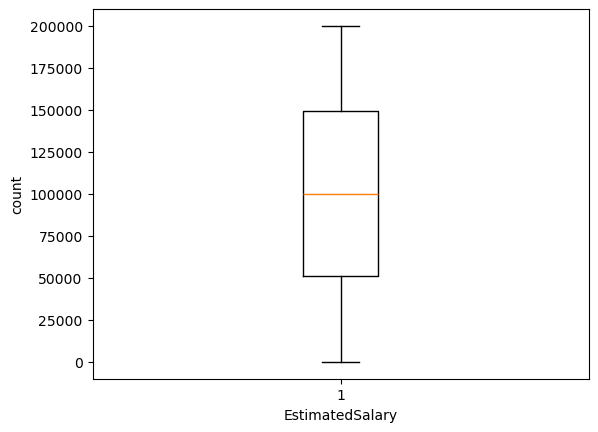

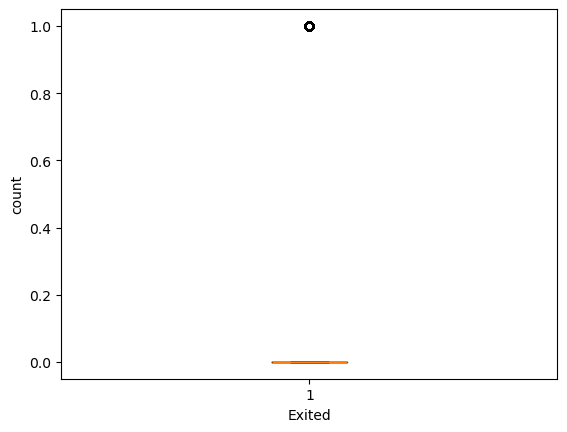

In [14]:
for col in data.columns:
    if ((data[col].dtypes != 'object') and (col != 'Age')):
        plt.boxplot(data[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [15]:
col_l=['CreditScore','NumOfProducts','Exited']

In [16]:
for i in col_l:
    if data[i].dtypes != 'object':
        P1=data[i].quantile(0.01)
        P2=data[i].quantile(0.99)
        data[i][data[i]<P1] = P1
        data[i][data[i]>P2] = P2

In [17]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})

In [18]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,1


In [19]:
data.drop('Age',axis=1,inplace=True)

In [20]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [21]:
X=data.drop(columns = 'Exited')
y=data['Exited']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify = y,random_state=46)

#### StandardScalar

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

#### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
Log_reg = LogisticRegression()

In [32]:
Log_reg.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred = Log_reg.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,y_pred)

0.797

In [36]:
from sklearn.metrics import *

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       1.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.90      0.50      0.45      2000
weighted avg       0.84      0.80      0.71      2000



##### using grid_search_cv

In [39]:
param_log ={
    "penalty":['l1','l2','elas'],
    "C":np.logspace(-4,4,20),
    "solver":['lbfg','liblinear','newton-cg','newton-cholesky','sag','saga'],
    "max_iter":[100,1000,2500,5000]
}

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
grid_R=GridSearchCV(Log_reg,param_grid=param_log,cv=10,n_jobs=-1)

In [42]:
grid_R.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elas'],
                         'solver': ['lbfg', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [43]:
grid_R.best_params_

{'C': 0.012742749857031334,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [44]:
grid_R.best_score_

0.796375

In [45]:
y_proba = Log_reg.predict_proba(X_test)[:,1]

In [46]:
roc_auc = roc_auc_score(y_test,y_proba)

In [47]:
roc_auc

0.6541364168482813

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

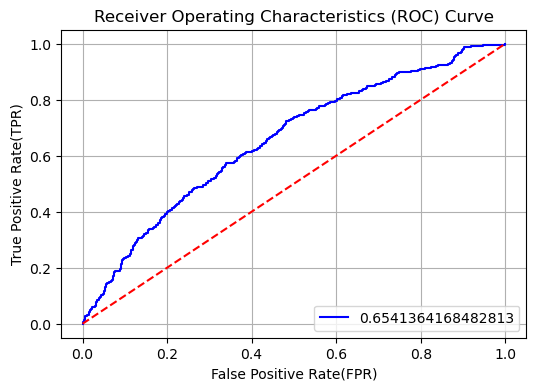

In [49]:
plt.figure(figsize=(6, 4))
plt.plot(fpr,tpr, color='blue', label=roc_auc)
plt.plot([0,1],[0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier(n_estimators=50,random_state=42)

In [53]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [54]:
y_predr = rfc.predict(X_test)

In [55]:
y_predr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
from sklearn.metrics import *

In [57]:
accuracy_score(y_test,y_predr)

0.802

In [58]:
print(classification_report(y_test,y_predr))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      1593
           1       0.53      0.22      0.31       407

    accuracy                           0.80      2000
   macro avg       0.68      0.59      0.60      2000
weighted avg       0.77      0.80      0.77      2000



In [59]:
param_rt={
    'n_estimators':[100,200,300],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini','entropy']
}

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
grid_r = GridSearchCV(rfc,param_grid = param_rt,cv=2)

In [ ]:
grid_r.fit(X_train,y_train)

In [62]:
y_probr = rfc.predict_proba(X_test)[:,1]

In [63]:
roc_aucr = roc_auc_score(y_test,y_probr)

In [64]:
roc_aucr

0.7306366458908831

In [65]:
fpr, tpr, threshold = roc_curve(y_test,y_probr)

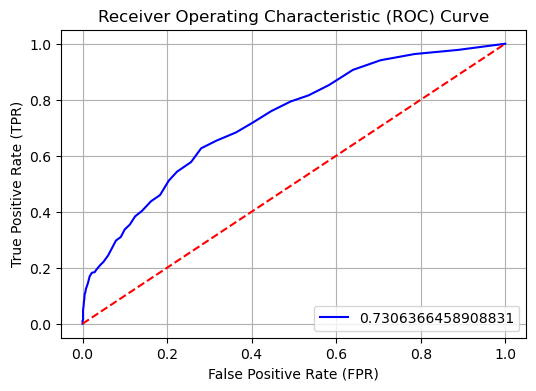

In [66]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=roc_aucr)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()